In [3]:
pip install wheel

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 6.8 MB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


## Gathering reference traces

In [1]:
import numpy as np
import pickle

all_traces = np.empty((0, 5000))  # create empty array to store concatenated traces
all_labels = np.empty(0, dtype=int)  # create empty array to store concatenated labels

for i in range(1, 30):
    file_path = f"reftraces/200reftrace_first entry_{i}.pkl"
    with open(file_path, "rb") as pickle_in:
        trace = pickle.load(pickle_in).transpose()
        label = np.full(200, i)
        
        all_traces = np.concatenate((all_traces, trace), axis=0)
        all_labels = np.concatenate((all_labels, label), axis=0)


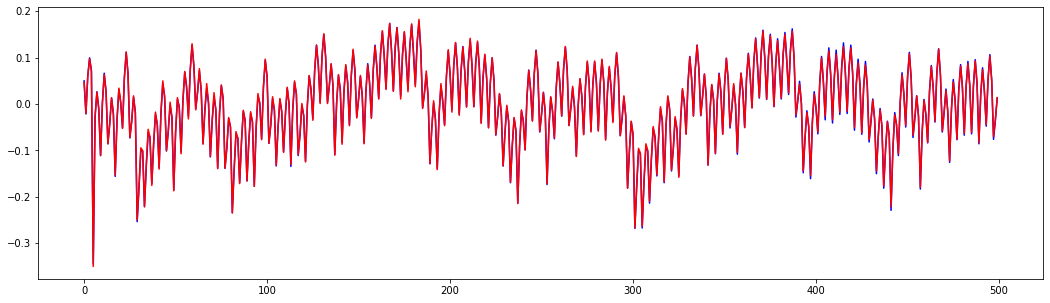

In [2]:
# Plot the traces
import matplotlib.pyplot as plt


plt.figsize=(6,7)
plt.gcf().set_size_inches(18, 5) 
plt.plot(all_traces[10][0:500], color = 'blue')# Not a specific slice, this is just an exampleto plot the trace
plt.plot(all_traces[120][0:500], color = 'red') 
plt.show()


## ML side-channel analysis

In [6]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(all_traces, all_labels, test_size=0.2)

from sklearn.neural_network import MLPClassifier 

Dec_clf = MLPClassifier(
    random_state=42,
    solver='adam', 
    learning_rate='adaptive',
    max_iter=3000,
    hidden_layer_sizes=[400],
    batch_size=500,
    alpha=0.0001, # set alpha for L2 regularization
    early_stopping=True,
    n_iter_no_change=1000,
    verbose=False, 
)


In [7]:
Dec_clf.fit(X_train, y_train)

/home/sou/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=500, early_stopping=True, hidden_layer_sizes=[400],
              learning_rate='adaptive', max_iter=3000, n_iter_no_change=1000,
              random_state=42)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(all_traces, all_labels, test_size=0.2)

predictions =np.zeros(len(y_test))
predictions = Dec_clf.predict(X_test)
success = 0

for i in range(len(y_test)):
    if predictions[i] == y_test[i]: 
        success = success +1
    #else:
        #print(predictions[i], y_test['i])
 
         
print((success /len(y_test))*100)

100.0


In [9]:
success = 0
for i in range(len(y_test)):
    if predictions[i] == y_test[i]: 
        success = success +1
    else:
        print(predictions[i], y_test[i])
 
         
print((success /len(y_test))*100)

100.0


In [10]:
predictions[0:10]

array([ 1,  4, 14,  6, 14, 15, 20, 17,  8, 11])

### Attack phase

In [56]:
attack_traces = np.empty((30, 5000))  # create empty array to store concatenated traces
attack_labels = np.empty(30, dtype=int)  # create empty array to store concatenated labels

for i in range(0, 29):
    
    file_path_labels = f"attacktraces/oilvector_{i}.pkl"
    with open(file_path_labels, "rb") as pickle_in_labels:
        label = pickle.load(pickle_in_labels) 
        print(label)
        #all_attack_labels[i] = label[0:2]
        
    file_path = f"attacktraces/attacktrace_{i}.pkl"
    with open(file_path, "rb") as pickle_in:
        trace = pickle.load(pickle_in).transpose()
        attack_traces[i] = trace


28,20,27,2,13,6,26,15,27,24,10,21,25,26,25,12,17,27,3,15,11,5,5,13,24,18,11,1,9,12,11,8,11,11,20,6,0,19,5,12,10,11,18,27,26,26,28,30,12,1,27,19,13,6,7,10,7,29,16,9,17,4,26,15,25,23,16,21,7,26,18,5,17,27,8,10,24,22,9,12,5,30,4,23,16,4,11
25,22,6,7,23,16,29,12,11,3,19,16,24,17,25,13,7,22,0,1,11,19,22,27,18,15,28,16,18,17,6,24,16,17,26,17,25,26,16,28,7,21,12,30,14,6,5,26,8,13,27,22,11,18,26,16,29,29,18,3,12,22,11,14,12,19,18,6,23,1,4,21,13,19,6,4,5,8,22,19,5,8,28,29,27,6,17
27,13,1,6,17,26,27,13,29,30,6,3,29,8,12,11,23,24,0,30,20,9,13,4,18,28,5,8,10,24,30,15,10,1,27,8,18,0,27,23,20,1,9,11,30,21,13,4,18,23,13,15,1,24,21,28,19,1,22,17,21,26,28,28,4,2,19,22,5,10,16,24,20,6,18,20,10,18,6,1,30,8,25,16,13,18,30
16,26,21,19,19,24,22,8,6,6,18,15,4,5,1,12,18,26,27,22,20,11,25,6,9,20,3,8,10,3,1,0,13,29,7,20,6,19,28,9,22,8,24,13,8,3,11,7,15,24,11,2,13,30,3,29,19,2,14,25,16,15,23,11,7,13,4,6,4,4,19,3,30,14,19,24,27,16,2,15,15,25,17,19,30,22,8
22,6,1,23,2,22,24,9,1,5,6,11,3,12,0,20,26,10,22,15,24,26,1

In [57]:
predictions= Dec_clf.predict(attack_traces)


In [58]:
predictions

array([ 5, 25, 17,  9,  3,  5, 13, 12, 13, 14,  5,  9,  4, 12, 12, 12,  7,
        5, 17,  1, 15,  9, 26, 14,  5,  2,  5, 10, 13,  8])

In [59]:
attack_labels

array([ 4, 24, 16,  8,  2,  4, 12, 11, 12, 13,  4,  8,  3, 11, 11, 11,  6,
        4, 16,  0, 14,  8, 25, 13,  4,  1,  4,  9, 12,  4])

In [60]:
predictions = Dec_clf.predict(attack_traces)
success = 0
for i in range(29):
    if predictions[i] == attack_labels[i]: 
        success = success +1
        print("Correct:", predictions[i], attack_labels[i])
    else:
        print("Wrong:", predictions[i], attack_labels[i])
 
         
print((success /len(attack_traces))*100)

Wrong: 5 4
Wrong: 25 24
Wrong: 17 16
Wrong: 9 8
Wrong: 3 2
Wrong: 5 4
Wrong: 13 12
Wrong: 12 11
Wrong: 13 12
Wrong: 14 13
Wrong: 5 4
Wrong: 9 8
Wrong: 4 3
Wrong: 12 11
Wrong: 12 11
Wrong: 12 11
Wrong: 7 6
Wrong: 5 4
Wrong: 17 16
Wrong: 1 0
Wrong: 15 14
Wrong: 9 8
Wrong: 26 25
Wrong: 14 13
Wrong: 5 4
Wrong: 2 1
Wrong: 5 4
Wrong: 10 9
Wrong: 13 12
0.0


In [40]:
29*9

261